## Homework 5: Fitting (cont)

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW05.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

## Problem 1: Optical Pumping experiment

One of the experiments in the 111B (111-ADV) lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.74 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 5.08 </td><td> 5.40 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line using the least-squares method with equal weights, and draw the best-fit line through the data points in the graph.
1. From what s/he knows about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.10 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
import scipy.stats
import scipy.optimize as fitter

# Use current as the x-variable in your plots/fitting
current = np.arange(0, 2.3, .2)  # Amps
f = np.array([.14, .6, 1.21, 1.74, 2.47, 3.07, 3.83, 4.16, 5.08, 5.4, 6.31, 6.78]) # MHz

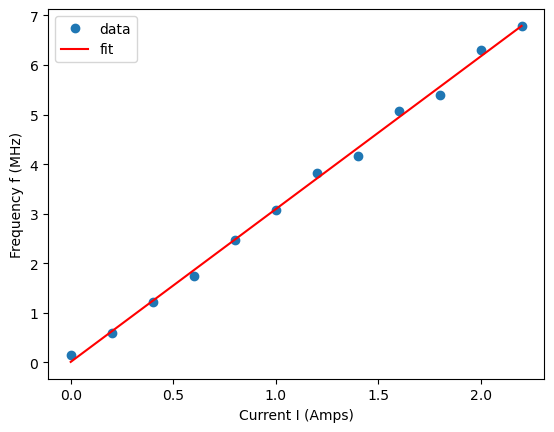

In [30]:
#1. Plot a graph of the pairs of values.
#   Assuming a linear relationship between 𝐼 and 𝑓,
#   determine the slope and the intercept of the best-fit line
#   using the least-squares method with equal weights,
#   and draw the best-fit line through the data points in the graph.
plt.plot(current, f, 'o', label = 'data')

def linear_model(x, slope, intercept):
    '''Model function to use with curve_fit();
       it should take the form of a line'''
    return intercept + slope * x
    
# Use fitter.curve_fit() to get the line of best fit
# Plot this line, along with the data points -- remember to label
par0 = np.array([3, 0])
par, cov = fitter.curve_fit(linear_model, current, f, par0)

slope = par[0]
intercept = par[1]

plt.plot(current, linear_model(current, *par), 'r-', label = 'fit')
plt.legend()
plt.xlabel('Current I (Amps)')
plt.ylabel('Frequency f (MHz)')
plt.show()

The rest is pretty short, but the statistics might be a bit complicated.  Ask questions if you need advice or help.  Next, the problem is basically asking you to compute the $\chi^2$ for the above fit twice, once with $0.01$ as the error for each point (in the 'denominator' of the $\chi^2$ formula) and once with $1$.  

These values can then be compared to a "range of acceptable $\chi^2$ values", found with `scipy.stats.chi2.ppf()` -- which takes two inputs.  The second input should be the number of degrees of freedom used during fitting (# data points minus the 2 free parameters).  The first input should be something like $0.05$ and $0.95$ (one function call of `scipy.stats.chi2.ppf()` for each endpoint fo the acceptable range).  If the calculated $\chi^2$ statistic falls within this range, then the assumed uncertainty is reasonable.

In [73]:
#2. From what s/he knows about the equipment used to measure the resonant frequency,
#   your lab partner hastily estimates the uncertainty
#   in the measurement of 𝑓 to be 𝜎(𝑓)=0.01 MHz.
#   Estimate the probability that the straight line you found
#   is an adequate description of the observed data
#   if it is distributed with the uncertainty guessed by your lab partner.
#   (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).
#   What can you conclude from these results?
model = linear_model(current, slope, intercept)
h_list = []
for i in range(0, 12):
    h = model[i] - f[i]
    h_list.append(h)

sigma_f = 0.01
chi2 = np.sum((np.array(h_list))**2 / sigma_f)
df = len(current) - 2
p_value = 1 - scipy.stats.chi2.cdf(chi2 / 10, df)

print('chi-square = {0:.10f}'.format(chi2/10))
print('p-value = {0:.10f}'.format(p_value))

print('>> The uncertainty gives a very good fit.')

chi-square = 1.3803694639
p-value = 0.9992621089
>> The uncertainty gives a very good fit.


In [74]:
# 3. Repeat the analysis assuming your partner estimated the uncertainty to be 𝜎(𝑓)=1
#    MHz. What can you conclude from these results?
sigma_f = 1
chi2_2 = np.sum((np.array(h_list))**2 / sigma_f)
df = len(current) - 2
p_value = 1 - scipy.stats.chi2.cdf(chi2_2 / 10, df)

print('chi-square = {0:.10f}'.format(chi2_2/10))
print('p-value = {0:.15f}'.format(p_value))

print('>> The chi-squared is too low, and the p-value is very high.')
print('>> The error is too high.')

chi-square = 0.0138036946
p-value = 0.999999999999870
>> The chi-squared is too low, and the p-value is very high.
>> The error is too high.


Now, estimate the uncertainty in the frequency measurements, and use this to find the uncertainty in the best-fit parameters.  [This document](https://pages.mtu.edu/~fmorriso/cm3215/UncertaintySlopeInterceptOfLeastSquaresFit.pdf) is a good resource for learning to propagate errors in the context of linear fitting.


In [72]:
#4. Assume that the best-fit line found in Part 1 is a good fit to the data.
#   Estimate the uncertainty in measurement of 𝑦 from the scatter of the observed data
#   about this line. Again, assume that all the data points have equal weight.
#   Use this to estimate the uncertainty in both the slope and the intercept
#   of the best-fit line. This is the technique you will use in the Optical Pumping lab
#   to determine the uncertainties in the fit parameters.
h_array = np.array(h_list)
error1 = abs(h_array)
par2, cov2 = fitter.curve_fit(linear_model, current, f, par, error1)

slope_uncertainty = np.sqrt(cov2[0,0])
intercept_uncertainty = np.sqrt(cov2[1,1])
print('slope_uncertainty = {0:5.10f}'.format(slope_uncertainty))
print('intercept_uncertainty = {0:5.10f}'.format(intercept_uncertainty))

slope_uncertainty = 0.0067619622
intercept_uncertainty = 0.0079454838


Finally, repeat the fitting with the weighted errors (from the $\sigma(f)$ uncertainty formula) given to `scipy.optimize.curve_fit()`

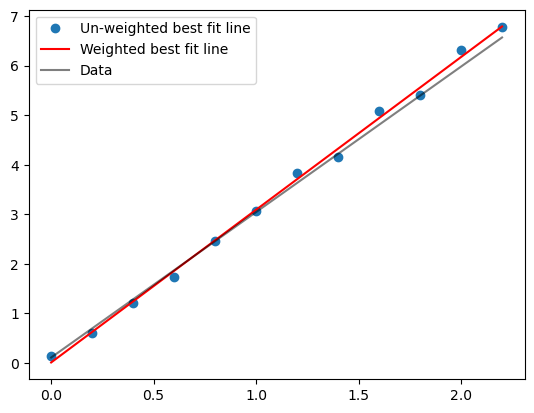

un_weighted slope :  3.0819930069195456
un_weighted intercept :  0.00897435930652852
weighted slope :  2.935608269899128
weighted intercept :  0.10907316070481507


In [71]:
# 5. Now assume that the uncertainty in each value of 𝑓 grows with 𝑓: 𝜎(𝑓)=0.10+0.03∗𝑓 (MHz).
#    Determine the slope and the intercept of the best-fit line
#    using the least-squares method with unequal weights (weighted least-squares fit)

sigma = 0.01 + 0.03 * f
par_weighted, cov_weighted = fitter.curve_fit(linear_model, current, f, par0, sigma)

plt.plot(current, f, 'o', label = 'data')
plt.plot(current, linear_model(current, *par), 'r-', label = 'fit')
plt.plot(current, linear_model(current, par_weighted[0], par_weighted[1]), 'k-',alpha = 0.5)
plt.legend(['Un-weighted best fit line', 'Weighted best fit line', 'Data'])
plt.show()

print('un_weighted slope : ', slope)
print('un_weighted intercept : ', intercept)
print('weighted slope : ', par_weighted[0])
print('weighted intercept : ', par_weighted[1])

## Problem 2: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident. You may also recognize this dataset from Homework04. That's not an accident either.]

You are given a dataset (`peak.dat`) from a gamma-ray experiment consisting of ~1000 events. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray (in MeV). We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Compute the mean and standard deviation of the distribution of energies and their statistical uncertainties. Assume the distribution is Gaussian and see the lecture notes for the formulas for the mean and variance of the sample and the formulas for the errors on these quantities. 
1. Fit the distribution to a Gaussian function using a binned least-squares fit (<i>Hint:</i> use <tt>scipy.optimize.curve_fit()</tt> function), and compare the parameters of the fitted Gaussian and their uncertainties to the parameters obtained in Part (2) 
1. Re-make your histogram from Part 1 with twice as many bins, and repeat the binned least-squares fit from Part 3 on the new histogram. How sensitive are your results to binning ? 
1. How consistent is the distribution with a Gaussian? In other words, compare the histogram from Part 1 to the fitted curve, and compute a goodness-of-fit value, such as $\chi^2$/d.f.




In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize as fitter

# Once again, feel free to play around with the matplotlib parameters
plt.rcParams['figure.figsize'] = 8,4
plt.rcParams['font.size'] = 14

energies = np.loadtxt('peak.dat') # MeV

Recall `plt.hist()` isn't great when you need error bars, so it's better to first use [`np.histogram()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) -- which returns the counts in each bin, along with the edges of the bins (there are $n + 1$ edges for $n$ bins).  Once you find the bin centers and errors on the counts, you can make the actual plot with [`plt.bar()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html).  Start with something close to `bins = 25` as the second input parameter to `np.histogram()`.

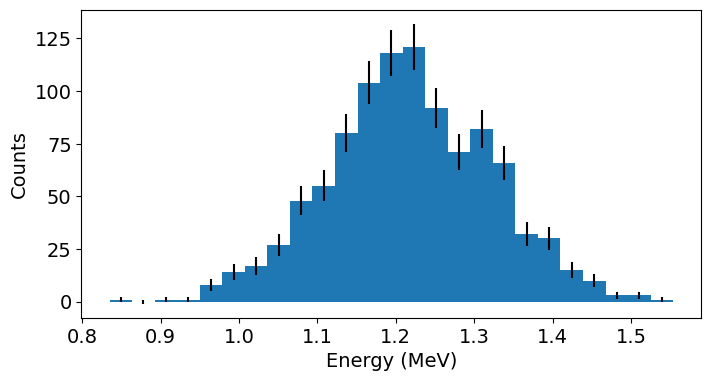

In [120]:
# use numpy.histogram to get the counts and bin edges
y, bin_edges = np.histogram(energies, bins=25)

# bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1]) works for finding the bin centers
x = 0.5*(bin_edges[1:] + bin_edges[:-1])

# assume Poisson errors on the counts – errors go as the square root of the count
error_y = np.sqrt(y)
error_y = [max(error, 1) for error in error_y]

# now use plt.bar() to make the histogram with error bars (remember to label the plot)
plt.bar(x, y, width=np.diff(bin_edges), align='edge', yerr=error_y)
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.show()

In [121]:
# Compute the mean and standard deviation of the list of `energies` and their uncertainties
mean = np.mean(energies)
std = np.std(energies)

N = len(energies)
d_mean = std / np.sqrt(N)
d_std = np.sqrt(2 * std ** 4 / (N-1))
print("mean: {0:.3f} +/- {1:.5f}".format(mean, d_mean))
print("standard deviation: {0:.3f} +/- {1:.5f}".format(std, d_std))

mean: 1.203 +/- 0.00328
standard deviation: 0.104 +/- 0.00048


Now, using the binned values (found above with `np.histogram()`) and their errors use `scipy.optimize.curve_fit()` to fit the data.

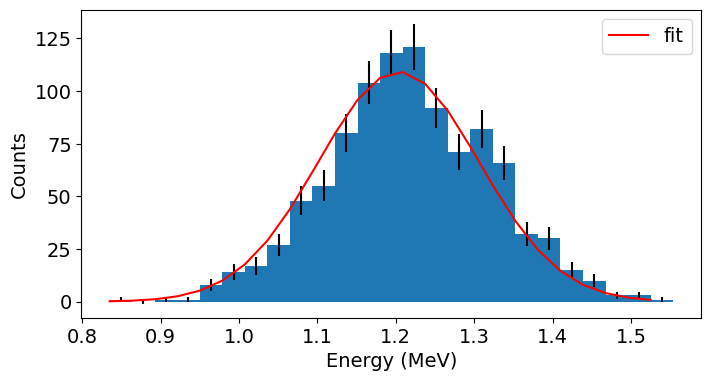

Fitted parameters:
Mean = 1.204 +/- 0.00336
Standard deviation = 0.103 +/- 0.00242
chi^2 = 22.57505
Reduced chi^2 = 1.026


In [122]:
# Remember, curve_fit() will need a model function defined
def model(x, A, mu, sigma):
    '''Model function to use with curve_fit();
       it should take the form of a 1-D Gaussian'''
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
# Also make sure you define some starting parameters for curve_fit (we typically called these par0 or p0 in the past workshop)
mu_init, std_init = scipy.stats.norm.fit(energies)
par0 = [max(y), mu_init, std_init]

# You can use this to ensure the errors are greater than 0 to avoid division by 0 within fitter.curve_fit()
counts_err = np.sqrt(y)
for i, err in enumerate(counts_err):
    if err == 0:
        counts_err[i] = 1

# Now use fitter.curve_fit() on the binned data and compare the best-fit parameters to those found by scipy.stats.norm.fit()
# It's also useful to plot the fitted curve over the histogram you made in part 1 to check that things are working properly
popt, pcov = fitter.curve_fit(model, x, y, p0=par0, sigma=error_y)
fit_A, fit_mu, fit_sigma = popt
d_fit_A, d_fit_mu, d_fit_sigma = np.sqrt(np.diag(pcov))

plt.bar(x, y, width=np.diff(bin_edges), align='edge', yerr=error_y)
plt.plot(x, model(x, fit_A, fit_mu, fit_sigma), label='fit', color='r')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.show()

# At this point, it's also useful to find the chi^2 and reduced chi^2 value of this binned fit
residuals = y - model(x, *popt)
chi2 = np.sum((residuals / error_y) ** 2)
df = len(y) - 3
red_chi2 = chi2 / df

print("Fitted parameters:")
print("Mean = {0:.3f} +/- {1:.5f}".format(fit_mu, d_fit_mu))
print("Standard deviation = {0:.3f} +/- {1:.5f}".format(fit_sigma, d_fit_sigma))
print('chi^2 = {0:.5f}'.format(chi2))
print("Reduced chi^2 = {0:.3f}".format(red_chi2))

Repeat this process with twice as many bins (i.e. now use `bins = 50` in `np.histogram()`, or a similar value).  Compute the $\chi^2$ and reduced $\chi^2$ and compare these values, along with the best-fit parameters between the two binned fits.  Feel free to continue to play with the number of bins and see how it changes the fit.

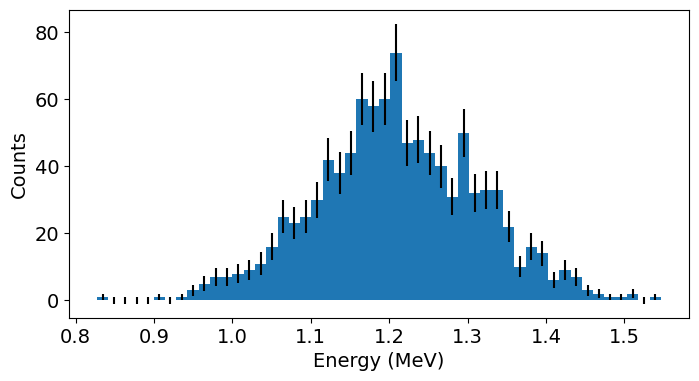

mean: 1.203 +/- 0.00328
standard deviation: 0.104 +/- 0.00048


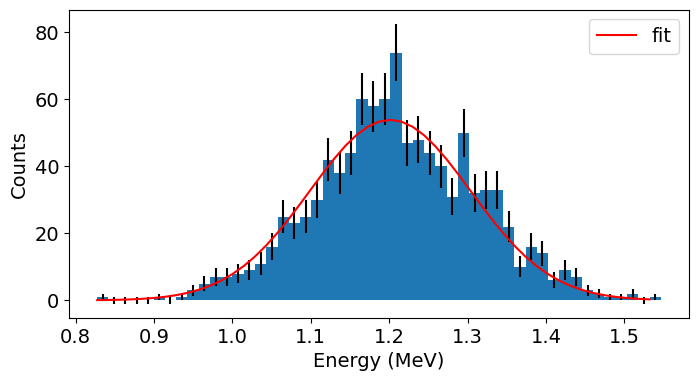

Fitted parameters:
Mean = 1.201 +/- 0.00310
Standard deviation = 0.103 +/- 0.00233
chi^2 = 39.91390
Reduced chi^2 = 0.849
>> It is not sensitive to binning. The fit and the uncertainties don't change very much when the bin size changed from 25 to 50.


In [125]:
# use numpy.histogram to get the counts and bin edges
y, bin_edges = np.histogram(energies, bins=50)

# bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1]) works for finding the bin centers
x = 0.5*(bin_edges[1:] + bin_edges[:-1])

# assume Poisson errors on the counts – errors go as the square root of the count
error_y = np.sqrt(y)
error_y = [max(error, 1) for error in error_y]

# now use plt.bar() to make the histogram with error bars (remember to label the plot)
plt.bar(x, y, width=np.diff(bin_edges), align='edge', yerr=error_y)
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.show()

# Compute the mean and standard deviation of the list of `energies` and their uncertainties
mean = np.mean(energies)
std = np.std(energies)

N = len(energies)
d_mean = std / np.sqrt(N)
d_std = np.sqrt(2 * std ** 4 / (N-1))
print("mean: {0:.3f} +/- {1:.5f}".format(mean, d_mean))
print("standard deviation: {0:.3f} +/- {1:.5f}".format(std, d_std))

# Remember, curve_fit() will need a model function defined
def model(x, A, mu, sigma):
    '''Model function to use with curve_fit();
       it should take the form of a 1-D Gaussian'''
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
# Also make sure you define some starting parameters for curve_fit (we typically called these par0 or p0 in the past workshop)
mu_init, std_init = scipy.stats.norm.fit(energies)
par0 = [max(y), mu_init, std_init]

# You can use this to ensure the errors are greater than 0 to avoid division by 0 within fitter.curve_fit()
counts_err = np.sqrt(y)
for i, err in enumerate(counts_err):
    if err == 0:
        counts_err[i] = 1

# Now use fitter.curve_fit() on the binned data and compare the best-fit parameters to those found by scipy.stats.norm.fit()
# It's also useful to plot the fitted curve over the histogram you made in part 1 to check that things are working properly
popt, pcov = fitter.curve_fit(model, x, y, p0=par0, sigma=error_y)
fit_A, fit_mu, fit_sigma = popt
d_fit_A, d_fit_mu, d_fit_sigma = np.sqrt(np.diag(pcov))

plt.bar(x, y, width=np.diff(bin_edges), align='edge', yerr=error_y)
plt.plot(x, model(x, fit_A, fit_mu, fit_sigma), label='fit', color = 'r')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.show()

# At this point, it's also useful to find the chi^2 and reduced chi^2 value of this binned fit
residuals = y - model(x, *popt)
chi2 = np.sum((residuals / error_y) ** 2)
df = len(y) - 3
red_chi2 = chi2 / df

print("Fitted parameters:")
print("Mean = {0:.3f} +/- {1:.5f}".format(fit_mu, d_fit_mu))
print("Standard deviation = {0:.3f} +/- {1:.5f}".format(fit_sigma, d_fit_sigma))
print("chi^2 = {0:.5f}".format(chi2))
print("Reduced chi^2 = {0:.3f}".format(red_chi2))

print(">> It is not sensitive to binning. \
The fit and the uncertainties don't change very much \
when the bin size changed from 25 to 50.")

Compute the <i>goodness-of-fit</i> parameters, i.e. $\chi^2$ and $\chi^2/N_{df}$. Compute the quantile of the $\chi^2$ for a standard `chi2` distribution with $N_{df}$ degrees of freedom.

In [135]:
residuals = y - model(x, *popt)
chi2 = np.sum((residuals / error_y) ** 2)
df = len(y) - len(popt)
red_chi2 = chi2 / df

print ('chi^2 = {0:5.2f}'.format(chi2))
print ('red_chi2^2={0:5.2f}'.format(red_chi2))

chi^2 = 39.91
red_chi2^2= 0.85


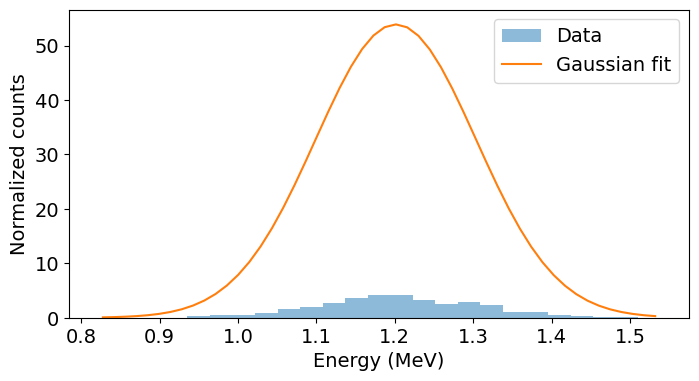

In [138]:
plt.hist(energies, bins=25, density=True, alpha=0.5, label='Data')
plt.plot(x, model(x, *popt), label='Gaussian fit')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized counts')
plt.show()